In [1]:
%pip install -q pandas

import piplite
await piplite.install("pandas")
await piplite.install("matplotlib")
await piplite.install("seaborn")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [85]:
# Read in survey data and check the raw data
df = pd.read_csv("mxmh_survey_results.csv")
df.shape
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [86]:
# How old are the participants? Check for mean and median of age
print('Mean age: ' + str(df['Age'].mean()))
print('Median age: '+ str(df['Age'].median()))

Mean age: 25.206802721088437
Median age: 21.0


In [87]:
# Check the data quality: 
# How many columsn contain NaN values? Which columns contain NaN values? 
col_w_nan = df.columns[df.isna().any()].tolist()
print('Number of columns with missing values: ' + str(len(col_w_nan)))
print(col_w_nan)

Number of columns with missing values: 8
['Age', 'Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'BPM', 'Music effects']


In [88]:
#  Which percentages of the values are missing?
perc_nan = df.isnull().sum()/df.shape[0]
perc_nan_sorted = perc_nan.sort_values(ascending=False)
print(perc_nan_sorted[:len(col_w_nan)])

BPM                          0.145380
Music effects                0.010870
Instrumentalist              0.005435
Foreign languages            0.005435
While working                0.004076
Primary streaming service    0.001359
Composer                     0.001359
Age                          0.001359
dtype: float64


In [89]:
# We fill the missing values for BPM and Age with the mean.
df['Age'].fillna(value = df['Age'].mean(), inplace = True)
df['BPM'].fillna(value = df['BPM'].mean(), inplace = True)

<ipython-input-89-11590efa8c92>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value = df['Age'].mean(), inplace = True)
<ipython-input-89-11590efa8c92>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [90]:
# We drop the remaining rows since we only loose very little data.
df = df.dropna(axis=0)
df.shape

(719, 33)

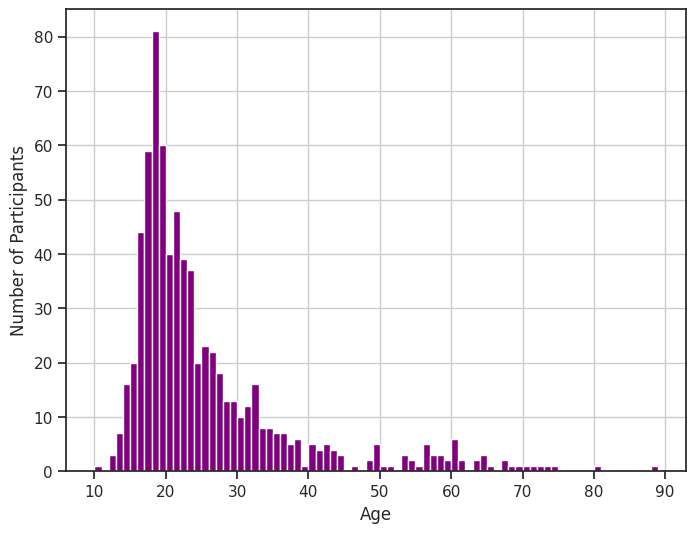

In [81]:
# Closer look on the age distribution. 
bin_edges = np.arange (10, df['Age'].max()+1, 1)
plt.hist(data = df, x = 'Age', bins = bin_edges, color = 'purple')
plt.xlabel('Age')
plt.ylabel('Number of Participants');

In [9]:
# Analyzing the importance of the genre on the improving effect of music
# The idea is to change the Music effects column to a boolean (1 = Improve) and use this as a counter
effects_of_genre = pd.concat([df['Fav genre'], df['Music effects']], axis=1, keys= ['Fav genre', 'Music effects'])
improving = effects_of_genre['Music effects']=='Improve'
improving_bool = improving.astype(int)

# How often was a genre named as favorite? This may effect how valid calculating a mean is.
effects_of_genre['Music effects'] = improving_bool
print(effects_of_genre['Fav genre'].value_counts())
plt.table()
df_effects = pd.DataFrame(effects_of_genre)
df_effects = pd.DataFrame(df_effects.groupby(df_effects['Fav genre'], as_index=False).mean().sort_values('Music effects'))

Fav genre
Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              35
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
Name: count, dtype: int64


Text(0.5, 0, 'Favorite Genre')

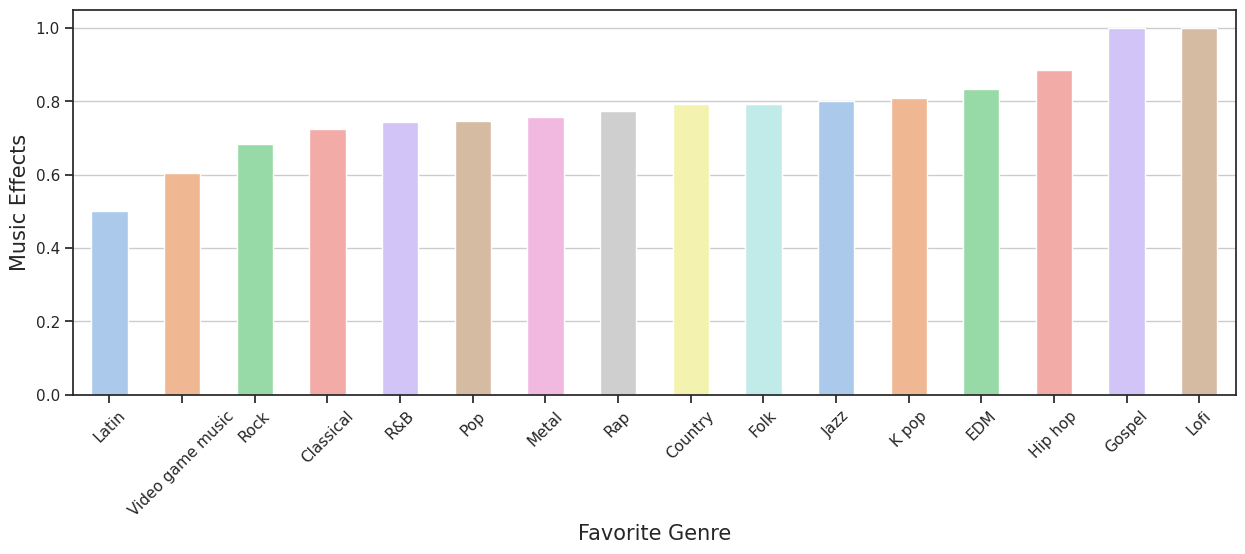

In [48]:
# Plot the mean of the results to see if there is a correlation
sns.set_theme()
sns.set_style("ticks",{'axes.grid' : True})
effects_plot = sns.barplot(x="Fav genre", y="Music effects", data=df_effects, palette=sns.color_palette('pastel', n_colors=16), hue = 'Fav genre', width = 0.5)
plt.xticks(rotation=45)
effects_plot.set_ylabel("Music Effects",fontsize=15)
effects_plot.set_xlabel("Favorite Genre",fontsize=15)

In [49]:
data_exploratory = pd.concat([df['Exploratory'], df['Music effects']],axis=1, keys= ['Exploratory', 'Music effects'])
data_exploratory = pd.DataFrame(data_exploratory)
data_exploratory['Music effects'] = improving_bool
data_exploratory = pd.DataFrame(data_exploratory)
exploratory_effects = pd.DataFrame(data_exploratory.groupby(data_exploratory['Exploratory']).sum())
print(exploratory_effects)

             Music effects
Exploratory               
No                     131
Yes                    405


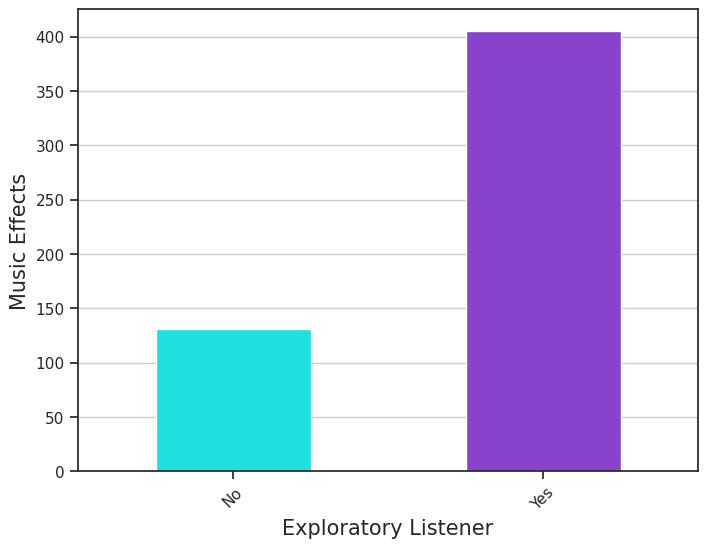

In [57]:
sns.set_theme(rc={'figure.figsize':(8,6)})
sns.set_style("ticks",{'axes.grid' : True})
cols = ['aqua', 'blueviolet']
effects_plot = sns.barplot(x="Exploratory", y="Music effects", data=exploratory_effects, palette=cols, hue = 'Exploratory', width = 0.5)
plt.xticks(rotation=45)
effects_plot.set_xlabel("Exploratory Listener",fontsize=15)
effects_plot.set_ylabel("Music Effects",fontsize=15);

In [80]:
anxiety = pd.concat([df['Anxiety'], improving_bool],axis=1, keys= ['Anxiety','Music effects'])
anxiety = pd.DataFrame(anxiety.groupby(anxiety['Anxiety'], as_index=False).sum())
depression = pd.concat([df['Depression'], improving_bool],axis=1, keys= ['Depression','Music effects'])
depression = pd.DataFrame(depression.groupby(depression['Depression'], as_index=False).sum())
insomnia = pd.concat([df['Insomnia'], improving_bool],axis=1, keys= ['Insomnia','Music effects'])
insomnia = pd.DataFrame(insomnia.groupby(insomnia['Insomnia'], as_index=False).sum())
ocd = pd.concat([df['OCD'], improving_bool],axis=1, keys= ['OCD','Music effects'])
ocd = pd.DataFrame(ocd.groupby(ocd['OCD'], as_index=False).sum())


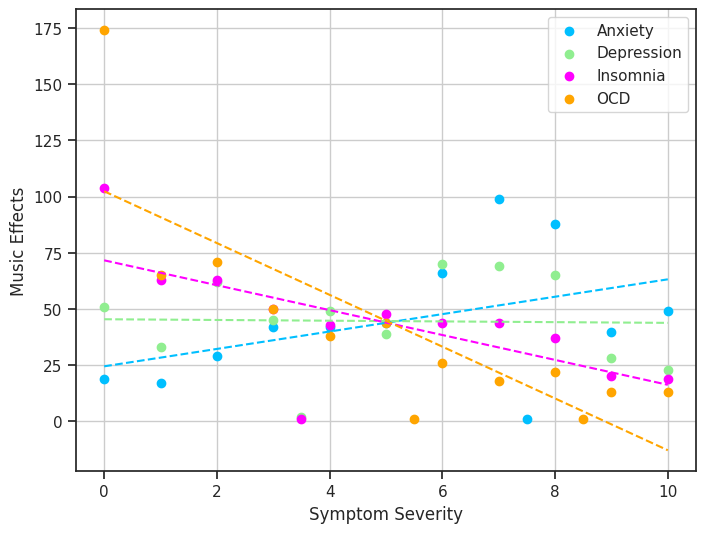

In [83]:
anxiety_fit = np.polyfit(anxiety['Anxiety'], anxiety['Music effects'], 1)
anxiety_line = np.poly1d(anxiety_fit)
depression_fit = np.polyfit(depression['Depression'], depression['Music effects'], 1)
depression_line = np.poly1d(depression_fit)
insomnia_fit = np.polyfit(insomnia['Insomnia'], insomnia['Music effects'], 1)
insomnia_line = np.poly1d(insomnia_fit)
OCD_fit = np.polyfit(ocd['OCD'], ocd['Music effects'], 1)
OCD_line = np.poly1d(OCD_fit)

np.random.rand(50)

plt.scatter(anxiety['Anxiety'], anxiety['Music effects'], color='deepskyblue', label = 'Anxiety');
plt.plot(anxiety['Anxiety'], anxiety_line(anxiety['Anxiety']),linestyle = 'dashed', color = 'deepskyblue');
plt.scatter(depression['Depression'], depression['Music effects'], color='lightgreen', label = 'Depression');
plt.plot(depression['Depression'], depression_line(depression['Depression']),linestyle = 'dashed', color = 'lightgreen')
plt.scatter(insomnia['Insomnia'], insomnia['Music effects'], color='magenta', label = 'Insomnia');
plt.plot(insomnia['Insomnia'], insomnia_line(insomnia['Insomnia']),linestyle = 'dashed', color = 'magenta')
plt.scatter(ocd['OCD'], ocd['Music effects'], color='orange', label = 'OCD');
plt.plot(ocd['OCD'], OCD_line(ocd['OCD']),linestyle = 'dashed', color = 'orange')
plt.legend(loc="upper right")
plt.xlabel('Symptom Severity')
plt.ylabel('Music Effects');